In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

-->Epoch = 10  ; Loss : 0.7295972586498982
-->Epoch = 20  ; Loss : 0.7087240490827691
-->Epoch = 30  ; Loss : 0.7014271650273688
-->Epoch = 40  ; Loss : 0.69780217675729
-->Epoch = 50  ; Loss : 0.6954746492261679
-->Epoch = 60  ; Loss : 0.6936073400694457
-->Epoch = 70  ; Loss : 0.6917734597879638
-->Epoch = 80  ; Loss : 0.6895941354514065
-->Epoch = 90  ; Loss : 0.686464833564288
-->Epoch = 100  ; Loss : 0.6809581353902634
-->Epoch = 110  ; Loss : 0.6688590316945836
-->Epoch = 120  ; Loss : 0.6402355582102881
-->Epoch = 130  ; Loss : 0.5959781182110931
-->Epoch = 140  ; Loss : 0.5508868934687492
-->Epoch = 150  ; Loss : 0.5127073151312086
-->Epoch = 160  ; Loss : 0.4823711483703603
-->Epoch = 170  ; Loss : 0.4584232771965734
-->Epoch = 180  ; Loss : 0.43919307862280976
-->Epoch = 190  ; Loss : 0.4233555496022459
-->Epoch = 200  ; Loss : 0.4099669157195774
-->Epoch = 210  ; Loss : 0.39837871274529363
-->Epoch = 220  ; Loss : 0.38814804257040303
-->Epoch = 230  ; Loss : 0.37896955571508

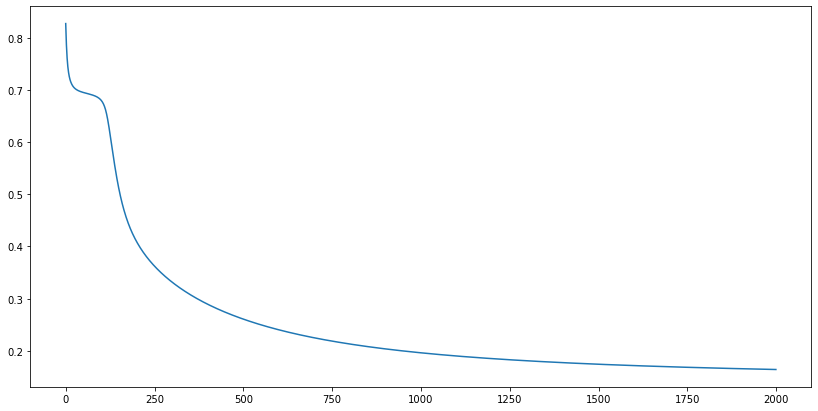

In [2]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def initialize_paramaters(n_input,n_hidden,n_output):
    W1 = np.random.randn(n_hidden,n_input)
    b1 = np.zeros((n_hidden,1))
    W2 = np.random.randn(n_output,n_hidden)
    b2 = np.zeros((n_output,1))
    
    parameters  = {'W1' : W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters

def forward_propagation(parameters,X,Y):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    m = X.shape[1]
    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = (Z1,A1,W1,b1,Z2,A2,W2,b2)
    log_probs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),(1 - Y))
    cost = -np.sum(log_probs) / m
    
    return cost,cache
    
def backward_propagation(cache,X,Y):
    (Z1,A1,W1,b1,Z2,A2,W2,b2) = cache
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T) / m
    db2 = np.mean(dZ2,axis=1,keepdims=True)
    
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1,A1 * (1 - A1))
    dW1 = np.dot(dZ1,X.T) / m
    db1 = np.mean(dZ1,axis=1,keepdims=True)
    
    gradients = {'dW2' : dW2 , 'db2' : db2 , 'dW1' : dW1,'db1' : db1}
    
    return gradients
    
def update_parameters(parameters,gradients,learning_rate):
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b1'] -= learning_rate * gradients['db1']
    parameters['b2'] -= learning_rate * gradients['db2']
    
    return parameters

epoch = 2000
learning_rate = 0.05
X,Y = make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=1.05,random_state=4)
X = X.T
Y = Y.reshape(1,100)

n_input = X.shape[0]
n_hidden = 4
n_output = Y.shape[0]

parameters = initialize_paramaters(n_input,n_hidden,n_output)
losses = np.zeros((epoch,1))

for i in range(epoch):
    losses[i,0],cache = forward_propagation(parameters,X,Y)
    if (i + 1) % 10 == 0:
        print(f'-->Epoch = {i+1}  ; Loss : {losses[i,0]}')
    gradients = backward_propagation(cache,X,Y)
    parameters = update_parameters(parameters,gradients,learning_rate)

plt.figure(figsize=(14,7))
plt.plot(losses)
plt.show()